In [1]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import accesspr as ac
import scipy.interpolate as scint
import prPlottingFunctions as ppf
%matplotlib inline


## Create an accesspr object with all your data
Now we create our first accesspr object by providing the folder with all our experiment pickle files.






In [37]:
pickleFileFolder='/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/allPicklesHXTPyruvate'
xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod', ignoreFiles=['p201703091.pkl'])
xpr.statContents

trying to open  p20170221.pkl
trying to open  p20170330.pkl
trying to open  p201704012.pkl

 Adding GFP80 as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20170221.pkl
aligning experiment  p201704012.pkl
aligning experiment  p20170330.pkl
Experiments aligned successfully.
experiment p20170221.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170330.pkl lacking machine attribute. Attempting retrieval from file...


,FLperod,gr,GFP,GFP80,c-GFP80perod,GFP70
p20170221.pkl,NaN,1,1.0,1.0,1.0,NaN
p201704012.pkl,NaN,1,NaN,1.0,1.0,1.0
p20170330.pkl,NaN,1,NaN,1.0,1.0,1.0


It tells us that it is trying to open files. 

It will also informed whether it was able to align the experiments successfully. More about this last bit later.



Now, to know everything we can do with accesspr, we do...

In [27]:
#help(xpr)


We will quickly screen the contents of the experiments.First we list the contents:

In [36]:
#xpr.listcontents()


If you notice, the p20160212.pkl experiment does not have strains with the names or strains we expected, other than hxt4. 
As we are not interested in these strains for now, We can also provide the the ignoreFiles argument, a list with the names of files to ignore. 

In [6]:
xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod')
#xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])
#xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])
#xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
xpr.statContents


trying to open  p20170221.pkl
trying to open  p201703091.pkl
trying to open  p20170330.pkl
trying to open  p201704012.pkl

 Adding GFP80 as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20170221.pkl
aligning experiment  p201704012.pkl
aligning experiment  p201703091.pkl
aligning experiment  p20170330.pkl
Experiments aligned successfully.
experiment p20170221.pkl lacking machine attribute. Attempting retrieval from file...
experiment p201703091.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170330.pkl lacking machine attribute. Attempting retrieval from file...


,FLperod,gr,GFP,GFP80,c-GFP80perod,GFP70
p20170221.pkl,NaN,1,1.0,1.0,1.0,NaN
p201704012.pkl,NaN,1,NaN,1.0,1.0,1.0
p201703091.pkl,NaN,1,1.0,1.0,1.0,NaN
p20170330.pkl,NaN,1,NaN,1.0,1.0,1.0


## Accessing experiments and Running plate reader routines within accesspr

As the xpr.statContents dataframe indicates above, there is a problem with the corrected fluorescence of p20160629. We can either a) locate the experiment and run the routine directly, or b) run the correctauto routine for all the experiments. Comment out the sections below as required.


In [7]:
xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
#sometimes the run crashes and trying again lets it build up on previous processing.
xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
xpr.containsstat('c-GFPperod')
xpr.statContents
xpr.alignAll(rerun=True)

KeyError: 'p20160629.pkl'

In [ ]:
##xpr.correctauto() receives all the arguments of pr.correctauto, with 2 modifications
## refstrain is a list of all possible reference strains in the experiment; it is important
##to place even a single strain name in brackets, or it will consider every letter
#as a reference strain.
##by default, it will skip those experiments which have already been processed. 
##to rerun, do rerun=True



xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])

Now we check the processing again:

In [ ]:
xpr.statContents

## Finding experiments with a particular condition
In the end, xpr.listcontents() provides a comprehensive list. But we are lazy and want a list of all experiments that contain a specific combination of media and strain. therefore we do:}

In [ ]:
media='Glu 2%'
strain='403.Hxt4std1'
xpr.containssetup(media, strain) #we interrogate which experiments contain the desired condition
print(xpr.containslist ) #containslist temporarily stores the list of experiments that have the condition 
#Warning: containslist gets modified constantly so make sure you call containssetup when you need it.
blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

magentaColors=['#fff7f3',
'#fde0dd',
'#fcc5c0',
'#fa9fb5',
'#f768a1',
'#dd3497',
'#ae017e',
'#7a0177']

purpleColors=['#fcfbfd',
'#efedf5',
'#dadaeb',
'#bcbddc',
'#9e9ac8',
'#807dba',
'#6a51a3',
'#4a1486',]






### Assigning, randomising and storing plot colors

If you notice closely, the method xpr.plotRawReplicates  outputs a dictionary that indicates what color was used for each experiment. you can iterate this process many times until you find a color set you like, or provide the color dictionary yourself through the argument exptColors. Keep this trick in mind for other plotting functions. 

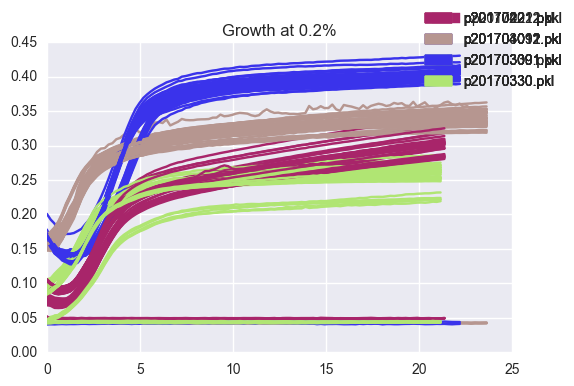

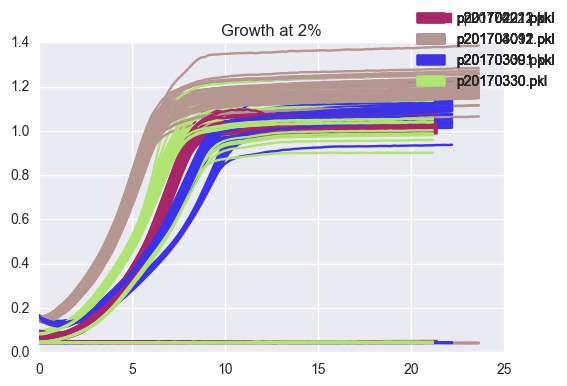

In [12]:
plt.figure()
ec= {'p20170221.pkl': ppf.randomColor(),'p201703091.pkl': ppf.randomColor(),'p20170330.pkl': ppf.randomColor(), 'p201704012.pkl': ppf.randomColor()}
[xpr.plotRawReplicates('Glu 0.2%',st, dtype='OD', exptColors=ec) for st in xpr.allStrains]; plt.title('Growth at 0.2%')
plt.figure()
[xpr.plotRawReplicates('Glu 2%',st, dtype='OD', exptColors=ec)  for st in xpr.allStrains]; plt.title('Growth at 2%')


## Merge cultures-replenish-incubate 3h-normalise: no apparent effect in growth

The ODs of cells from experiment 201704012 were all very different from each other, ranging between 0.4 and 0.7, a result for merging cultures of different ODs and volumes.  They were all normalised to an OD of 0.25 for the experiment. The graph below should show to what extent these OD differences impacted growth. 

In [ ]:
ppf.plotRawStatPerMediaRobust(xpr.data['p201704012.pkl'], dtype='OD')
#xpr.data['p201704012.pkl'].d['Glu 2%']['409.Hxt4'].keys()
#df= xpr.data['p201704012.pkl'].makedataframe(dnames=['doubling time', 'lag time','max growth rate','time of max growth rate', 'max OD','area under gr vs OD', 'plateloc'])

#['doubling time', 'lag time','max growth rate','time of max growth rate', 'max OD','area under gr vs OD', 'plateloc'].flatten()

#['max OD var', 'local max growth rate', 'ignoredwells', 'flogODvar', 'max growth rate var', 'refstrain', 'lag time', 'GFP80mn', 'ODmn', 'max growth rate', 'GFP70', 'sc-GFP80perodvar', 'data', 'GFP70mn', 'd/dtgrvar', 'c-GFP80var', 'time of local max growth rate', 'doubling time var', 'c-GFP80refstd', 'Time centered at flperod peak', 'max OD', 'OD ratio', 'originalplateloc', 'GFP80', 'c-GFP80perod', 'GFP80var', 'lag time var', 'doubling time', 'time of max growth rate', 'Time centered at gr peak', 'time of max growth rate var', 'area under gr vs OD', 'AutoFL', 'plateloc']
     

In [ ]:
xpr.data['p201704012.pkl'].df



## Checking processing status
We check whether the experiments have been processed: a) the growth curves have been fitted and b) the Fluorescence has been corrected. having experiments whose processing may be incomplete might interfere with certain analyses. 

We are particularly interested in knowing, besides the basics, whether the fluorescence time derivative has been calculated. we interrogate about this too.

### Ever-more statistics!

You can add and update the process of as many statistics as you want, and these checks will be recorded as long as one experiment contains the statistic.


In [ ]:
xpr.containsstat('d/dtFLperod')#now  checking for the flperod derivative
xpr.statContents
xpr.containsstat('Time centered at gr peak')#now  checking for the flperod derivative
xpr.FL

## Plotting Raw Replicates

Checking how consistent our replicates are

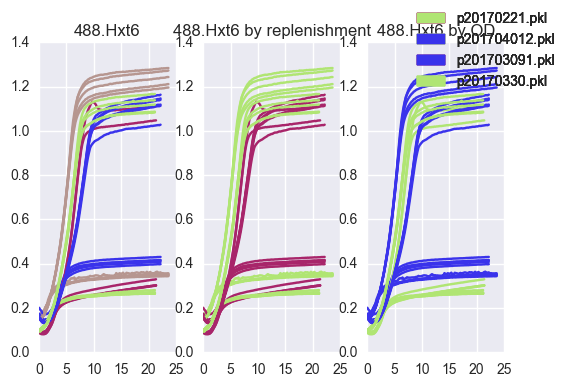

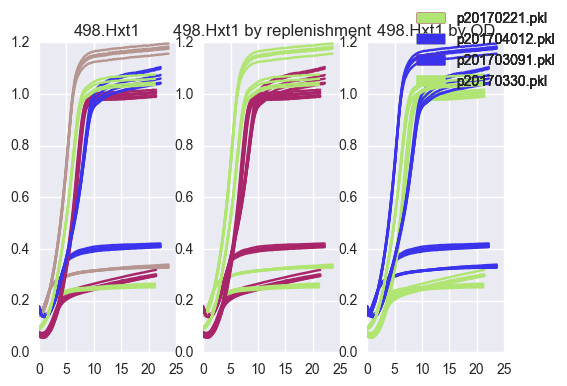

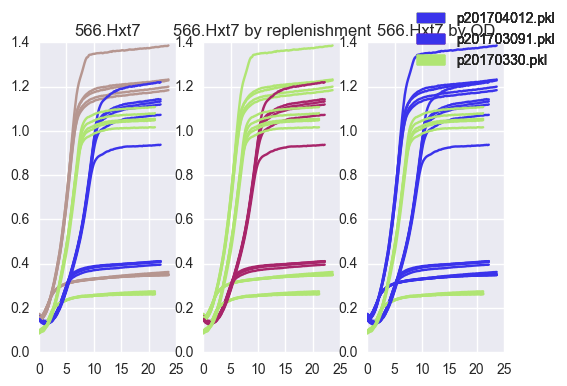

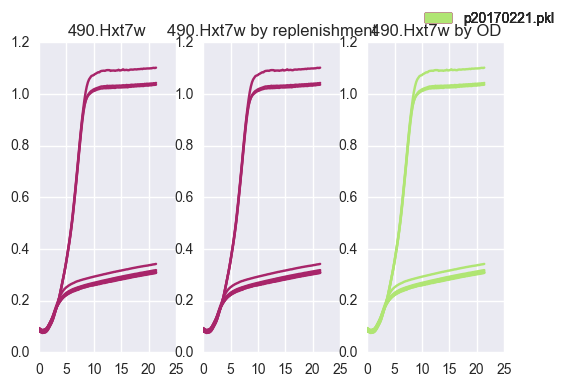

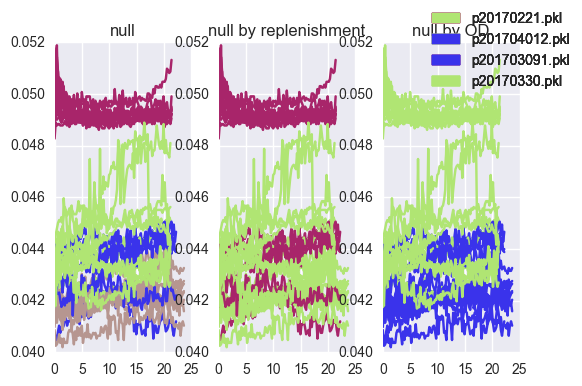

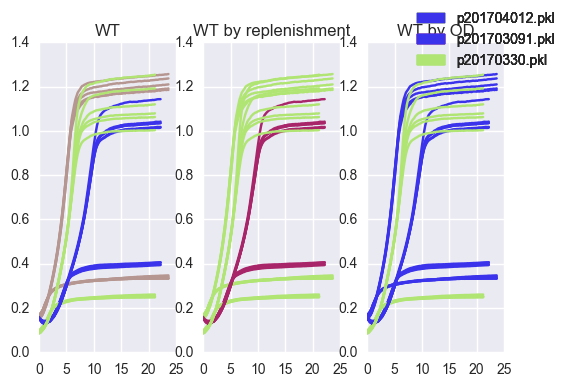

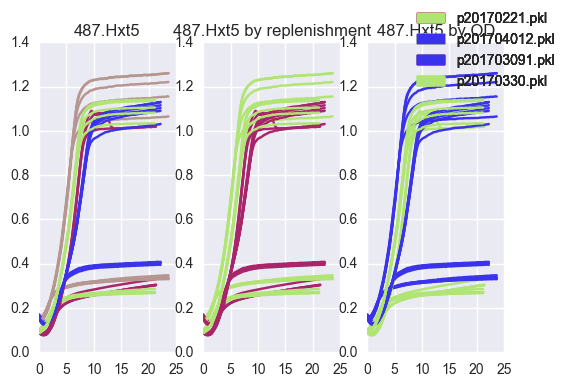

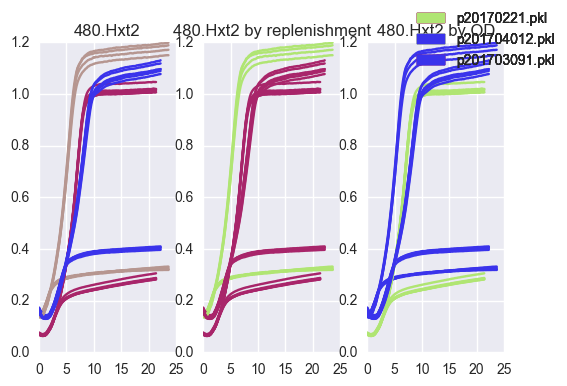

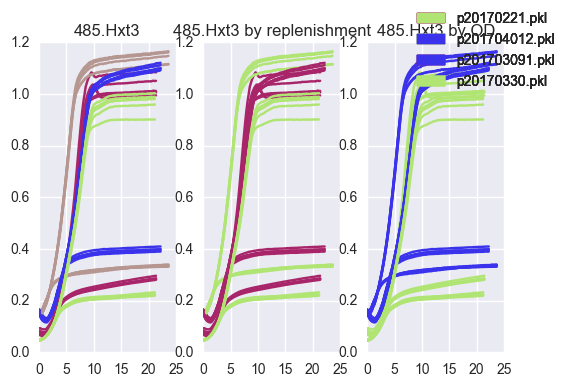

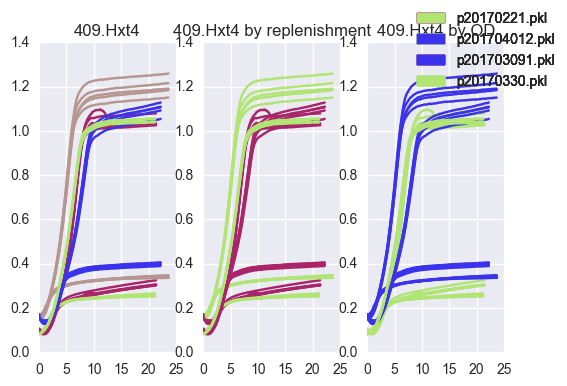

In [13]:

#color by replenishment
ecReplenished= {'p20170221.pkl': ec['p20170221.pkl'],'p201703091.pkl': ec['p20170221.pkl'],'p20170330.pkl': ec['p20170330.pkl'], 'p201704012.pkl': ec['p20170330.pkl']}
#color by OD
ecOD= {'p20170221.pkl': ec['p20170330.pkl'],'p201703091.pkl': ec['p201703091.pkl'],'p20170330.pkl': ec['p20170330.pkl'], 'p201704012.pkl': ec['p201703091.pkl']}

for st in xpr.allStrains:
    plt.figure();
    for md in xpr.allMedia:
        plt.subplot(131)
        xpr.plotRawReplicates(md, st, dtype='OD', exptColors=ec)
        plt.title(st)
        plt.subplot(132)
        xpr.plotRawReplicates(md, st, dtype='OD', exptColors=ecReplenished)
        plt.title(st+' by replenishment')
        plt.subplot(133)
        xpr.plotRawReplicates(md, st, dtype='OD', exptColors=ecOD)
        plt.title(st+' by OD')


So we can see there are three effects. 
a) p201704012 vs p201703091: same od, replenished vs not replenished. 
b) p201704012 p20170330: replenished, but started at a different OD. 
c) p20170221 vs p20170330: lower OD, replenished vs not replenished.

It is curious that respiratory growth only shows in an experiment where media was not replenished.

Probably in general it is worth trying a low initial OD, (around 0.20 or 0.15) because we have few cells in the pyruvate culture anyway.



# Plotting time-series information

## Combining replicates from different experiments

The challenge of combining replicates from different experiments, besides the obvious fact that= matching replicates are disperesed within the dataset, is:

* **sampling times for the same time series vary.** one experiment may have been measured at 3 hours, whereas another one may have been measured at 3.2. Even though the times are similar, collapsing them together just like that would be not only wrong – we would lose important information about the timing of events.  

* **lag time variability of cell growth**. As we are studying cells from stationary phase, release from the lag could vary each time.

The function xpr.plotReplicateMean solves these two problems by: 
* aligns all experiments by so that the time of the max growth rate is 0
* making sure all experiments have the same sampling times using interpolation 







Experiments have already been aligned. to realign, try rerun=True
               FLperod gr  GFP  GFP80  c-GFP80perod  GFP70  \
p20170221.pkl      NaN  1  1.0    1.0           1.0    NaN   
p201704012.pkl     NaN  1  NaN    1.0           1.0    1.0   
p20170330.pkl      NaN  1  NaN    1.0           1.0    1.0   

                Time centered at gr peak  
p20170221.pkl                   1.000000  
p201704012.pkl                  0.875000  
p20170330.pkl                   0.857143  
processing Glu 2%
processing Glu 2%
processing Glu 2%
processing Glu 2%
processing Glu 2%
processing Glu 2%
processing Glu 2%
processing Glu 0.2%
processing Glu 0.2%
processing Glu 0.2%
processing Glu 0.2%
processing Glu 0.2%
processing Glu 0.2%
processing Glu 0.2%


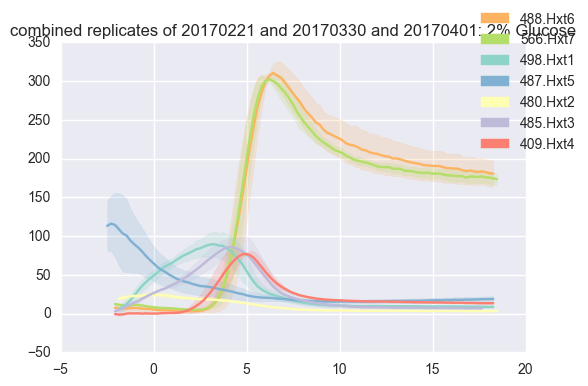

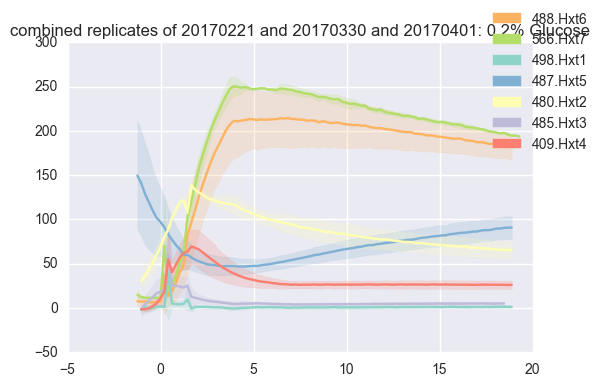

In [38]:
plt.figure()
media='Glu 2%'
xpr.containsstat('Time centered at gr peak')
xpr.alignAll()
print(xpr.statContents)
strcols={
'498.Hxt1': '#8dd3c7',
'480.Hxt2': '#ffffb3',
'485.Hxt3': '#bebada',
'409.Hxt4':'#fb8072',
'487.Hxt5':'#80b1d3',
'488.Hxt6':'#fdb462',
'566.Hxt7':'#b3de69',
}
patches=list()
lgnds=list()
for strn in strcols.keys():
    xpr.plotReplicateMean(media, strn,dtype='c-GFP80perod', col=strcols[strn])
    patches.append(pch.Patch(color=strcols[strn]))
    lgnds.append(strn)
plt.title('combined replicates of 20170221 and 20170330 and 20170401: 2% Glucose')                
plt.figlegend(patches, lgnds, 'upper right')
plt.figure()
media='Glu 0.2%'
plt.figure()
patches=list()
lgnds=list()
for strn in strcols.keys():
    xpr.plotReplicateMean(media, strn,dtype='c-GFP80perod', col=strcols[strn])
    patches.append(pch.Patch(color=strcols[strn]))
    lgnds.append(strn)
plt.title('combined replicates of 20170221 and 20170330 and 20170401: 0.2% Glucose')                
plt.figlegend(patches, lgnds, 'upper right')

We can also do the same plot for multiple media (one strain).

processing Glu 0.2%
processing Glu 2%


'#fb8072'

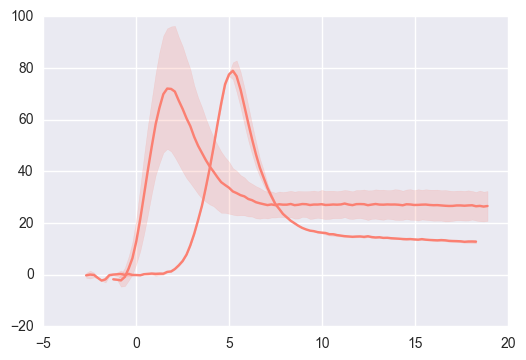

In [33]:
xpr.plotReplicateMean(media=['Glu 0.2%','Glu 2%'],strain='409.Hxt4',dtype='c-GFP80perod', col=strcols['409.Hxt4'])

## Comparing values at specific timepoints

Perhaps what is interesting is not the full time series, but specific values of our replicates at specific timepoints of it (for example, the max growth rate time, or exactlu 4.5 hours after induction. 

To this aim, we will use the functions timeStat, timeStatAligned and timeStatAll. 

For specific media and strain,

* xpr.timeStat(media, strain, times=[4], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) from the start of the experiment. 
* xpr.timeStatAligned(media, strain, times=[0], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) relative to the time of max growth rate of a specific strain.
* xpr.timeStatAll(times, aligned=False, includeMediaStrain=True)  retrieves a time-dependent statistic at specific time points. aligned determintes wherhet the times are absolute or relative to the max growth rate of the experiment.

The functions return a **dataframe** with the columns **experiment, media, strain**, and a column for each time.  

In [ ]:
xpr.timeStat('Glu 2%', '409.Hxt4', times=[0,2,4,6], dtype='c-GFP80perod')

In [ ]:
xpr.timeStatAligned('Glu 2%', '409.Hxt4', times=[-1,0,1], dtype='GFP80mn') ##retrieving 1 hr before and after max growth rate time

In [ ]:
times=[-1,0,1,2,3,4,5,6,7]
timedf=xpr.timeStatAll(times=times,dtype='c-GFP80perod', aligned=True)
timedf

Then we can transform the dataframe so that the time columns are reorganized into one variable column. this will allow us to do fancy plots.

In [ ]:
## putting all the time values as a single value variable 'time'. This removes the individual time columns and creates a
##an extra row per condition per time. then we can plot by time as a category.
tidydf=pd.melt(timedf, id_vars=['media', 'strain'], value_vars=times, var_name='time', value_name='c-GFP80perod')
ac.DFsubset(tidydf, 'media', ['Glu 0.2%'])

## Working on a subsection of a dataframe

    

In [ ]:
##We can define a dataframe subset based on any variable we like. 
#tidydf=ac.DFsubset(tidydf, 'media', ['Glu 0.2%', 'Glu 2%'])
#tidydf

### Response dynamics of Hxt4-yEGFP at different concentrations


In [16]:
#merging experiments:
xpr.statDerivative(dtype='gr')
xpr.containsstat('d/dtgr')
xpr.statDerivative(dtype='c-GFP80perod')
xpr.containsstat('d/dtc-GP80perod')
xpr.statContents
#sns.factorplot(x='time', y='c-GFP80perod',hue= 'strain', col='media', data=tidydf); 




experiment p20170221.pkl media Glu 2% strain 488.Hxt6 :
experiment p20170221.pkl media Glu 2% strain 498.Hxt1 :
experiment p20170221.pkl media Glu 2% strain 487.Hxt5 :
experiment p20170221.pkl media Glu 2% strain 480.Hxt2 :
experiment p20170221.pkl media Glu 2% strain 485.Hxt3 :
experiment p20170221.pkl media Glu 2% strain 409.Hxt4 :
experiment p20170221.pkl media Glu 2% strain 490.Hxt7w :
experiment p20170221.pkl media Glu 0.2% strain 488.Hxt6 :
experiment p20170221.pkl media Glu 0.2% strain 498.Hxt1 :
experiment p20170221.pkl media Glu 0.2% strain 487.Hxt5 :
experiment p20170221.pkl media Glu 0.2% strain 480.Hxt2 :
experiment p20170221.pkl media Glu 0.2% strain 485.Hxt3 :
experiment p20170221.pkl media Glu 0.2% strain 409.Hxt4 :
experiment p20170221.pkl media Glu 0.2% strain 490.Hxt7w :
something went wrong. carrying on.
something went wrong. carrying on.
something went wrong. carrying on.
something went wrong. carrying on.
something went wrong. carrying on.
something went wrong. car

,FLperod,gr,GFP,GFP80,c-GFP80perod,GFP70,Time centered at gr peak,d/dtgr
p20170221.pkl,NaN,1,1.0,1.0,1.0,NaN,1.000000,1.0
p201704012.pkl,NaN,1,NaN,1.0,1.0,1.0,0.875000,1.0
p201703091.pkl,NaN,1,1.0,1.0,1.0,NaN,0.875000,1.0
p20170330.pkl,NaN,1,NaN,1.0,1.0,1.0,0.857143,1.0


### Glucose response curve of Hxt4-yEGFP at different times

In [ ]:
sns.factorplot(x='media', y='c-GFP80perod',hue= 'strain', col='time', data=tidydf, order=['Glu 0.2%', 'Glu 2%'])


This is not very informative about the dose response curves as there are only 2 concentrations. but at leas you can see how some curves invert slopes.



## Scatter plot coloured by a third variable

not particularly interested in this section for this dataset yet. 



In [25]:
plottingNames={'498.Hxt1':'Hxt1',
               '480.Hxt2':'Hxt2',
               '485.Hxt3':'Hxt3',
               '409.Hxt4':'Hxt4',
               '487.Hxt5':'Hxt5',
               '488.Hxt6':'Hxt6',
               '566.Hxt7':'Hxt7'}
#cmap = matplotlib.colors.ListedColormap(['cyan',"black","magenta"], name='from_list', N=None)
#cmap = matplotlib.colors.ListedColormap(["black","magenta"], name='from_list', N=None)

cmap = matplotlib.colors.ListedColormap(["cyan", "black", 'magenta'], name='from_list', N=None)

#cmap='cool'
vmin=0
vmax=0
alpha=0.5
width=12
height=2
markersize=30
symmetric=True
plt.figure(figsize=(width, height))
plt.subplot(171)
ylim=[0, 0.4]
xlim=[-.3, .3]
xstat='d/dtgr'
ystat='gr'
stat='d/dtc-GFP80perod'
strains=['498.Hxt1','480.Hxt2','485.Hxt3','409.Hxt4','487.Hxt5','488.Hxt6','566.Hxt7']
ylabels=[1,0,0,0,0,0,0]
j=1
for strain in strains:
    for md in ['Glu 0.2%', 'Glu 2%']:
        plt.subplot(1,7,j)
        xpr.colorScatter(md, strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha, markersize=markersize, vmin=vmin, vmax=vmax, symmetric=symmetric, ylabel=ylabels[j-1])
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.title(plottingNames[strain])
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.xlabel(xstat)
        #for item in plt.gca().get_xticklabels():
            #item.set_rotation(45)
    j+=1
        


NameError: name 'matplotlib' is not defined

In [ ]:
strain='480.Hxt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.ylabel('')
plt.title(strain)
plt.gca().set_yticklabels([])
plt.subplot(173)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)
strain='485.Hxt3'
plt.gca().set_yticklabels([])
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.title(strain)
plt.ylabel('')
plt.subplot(174)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)
strain='409.Hxt4'
plt.gca().set_yticklabels([])
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.title(strain)
plt.ylabel('')
plt.subplot(175)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)
strain='487.Hxt5'
plt.gca().set_yticklabels([])
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.title(strain)
plt.ylabel('')
plt.subplot(176)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)
strain='488.Hxt6'
plt.gca().set_yticklabels([])
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.title(strain)
plt.ylabel('')
plt.subplot(177)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)
strain='566.Hxt7'
plt.gca().set_yticklabels([])
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha,markersize=markersize,vmin=vmin, vmax=vmax,symmetric=symmetric)
plt.ylabel('')
plt.title(strain)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xstat)


In [ ]:
alpha=0.5
plt.subplot(131)
xstat='ODmn'
ystat='c-GFP80perod'
stat='time'
strain='409.Hxt4'
cmap='viridis'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)

plt.title(strain)
plt.subplot(132)
strain='480.Hxt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(133)
strain='488.Hxt6'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 2%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha, addLegend=True)
plt.title(strain)


It looks like Hxt4 expression is always allocated to the 'drop in growth' regime.

# Analysis of point statistics through dataframes and seaborn 


## Extracting single-point statistics of all experiments

We are usually interested in one point-statistics about our strains. We will extract a lot of useful statistics and put them into a very nice pandas dataframe, which we will use for analysis. we want to exclude the media conditions, which are irrelevant and provide a lot of missing values. 





In [ ]:
df=xpr.extractAllInfo(excludeNull=True)
df=ac.DFsubset(df, 'experiment', ['p201704012.pkl'])

In [ ]:
sns.lmplot('InitialOD','maxGR', hue='media', data=df, fit_reg=False)
plt.title('Growth differences in p201704012')
sns.lmplot('InitialOD','grAUC', hue='media', data=df, fit_reg=False)
sns.lmplot('grAUC','FinalOD', hue='media', data=df, fit_reg=False)

We can see that hxt4df contains the stats for each condition in each experiment.

* Note: extractAllInfo() also extracts time series in the form of a string in the variables ending with description ending in 'TS'.

## Using seaborn to easily plot single point statistics



In [ ]:

sns.barplot('media','FinalOD', hue='experiment', order=['Glu 0.2%', 'Glu 2%'], data=df)
plt.title('Final OD is largely determined by Glucose')


In [ ]:
sns.lmplot('FinalOD','maxGR', hue='experiment', data=df, fit_reg=True)
plt.title('Influence of specific experiments in growth')

In [ ]:
sns.lmplot('FinalOD','grAUC', hue='experiment', data=df, fit_reg=True)
plt.title('Tight relationship between Final OD (glucose) and growth rate area.')

In [ ]:
sns.lmplot('InitialOD','maxGR', hue='experiment', data=df, fit_reg=False)
plt.title('Initial OD negatively impacts maxGR')

In [ ]:
sns.lmplot('InitialOD','maxGR', hue='strain', data=df, fit_reg=False)
plt.title('strains don''t majorly influence growth differences')

In [ ]:
sns.lmplot('lagTime','maxGR', hue='experiment', data=df, fit_reg=False)


In [ ]:
sns.lmplot('InitialOD','lagTime', hue='experiment', data=df, fit_reg=False)
plt.title('Initial OD does not completely explain lag time ')

In [ ]:
sns.lmplot('FLAbsPeakTime','FLPeak', hue='strain', col='experiment', data=df, fit_reg=False)
plt.title('Influence of Absolute  peak time in fluorescence')

In [ ]:
sns.lmplot('FLAlignedPeakTime','FLPeak', hue='strain', col='experiment', data=df, fit_reg=False)
plt.title('Influence of Aligned peak time in fluorescence')

In [ ]:
sns.lmplot('maxGRTime','FLAbsPeakTime', hue='strain', data=df, fit_reg=False)
plt.title('max growth rate time influences peak time for some strains')

In [ ]:
sns.lmplot('FinalOD','FLperodAUC', hue='strain', data=df, fit_reg=False)
plt.title('nutrient abundance time influences total fluorescence')

In [ ]:
sns.lmplot('InitialOD','InitialRawFL', hue='experiment', data=df, fit_reg=False)


The results above show that one of the experiments included shows a dodgy behabiour with regard to the others. This opens the possibility to consider it an outlier.

## Bar plots to compare statistics between media and strains


In [ ]:
b=sns.barplot('strain', 'FLPeak', data=ac.DFsubset(df, 'media', ['Glu 0.2%']), hue='experiment')
for item in b.get_xticklabels():                                                           
    item.set_size(10)                                                                                                   
    item.set_rotation(45)
plt.title('0.2% glucose. growth differences minimally impact FLperod peak\n(Hxt5 peaks at the beginning of the experiment)')
plt.figure()   
c=sns.barplot('strain', 'FLPeak', data=ac.DFsubset(df, 'media', ['Glu 2%']), hue='experiment')
for item in c.get_xticklabels():                                                           
    item.set_size(10)                                                                                                   
    item.set_rotation(45)
plt.title('2% glucose')
plt.figure()
b=sns.barplot('strain', 'FLperodAUC', data=df, hue='media', hue_order= ['Glu 0.2%','Glu 2%'])
for item in b.get_xticklabels():                                                           
    item.set_size(10)                                                                                                   
    item.set_rotation(45)

## Linear models between variables 

### (Glucose vs FL Peak time)
We would like to know if the fluorescence peak time changes with glucose (proxied here by FinalOD) 
and with different genetic backgrounds.

In [ ]:
sns.lmplot('FinalOD', 'FLperodAUC', hue='strain',data=df, fit_reg=False)

# More fancy accesspr features coming soon...


In [ ]:
##debug code for interpTimes.

def fitsBounds(x, bounds):
    if x> bounds[0] and x< bounds[1]:
        return True
    else:
        return False
ignoreExps=False
dtype='GFP'
media='Glu 2%'
strain='403.Hxt4std1'
xpr.containssetup(media, strain, strict=True, musthave=dtype)
experimentList=xpr.containslist
interpRange=[]
maxLengths=[]
startPoints=[]
adjustedTimes=dict()
for expt in experimentList: ###retireving the limiting values for interpolation amongst all experiments.
	if ignoreExps != False and expt in ignoreExps:
		continue
for expt in experimentList: ###retireving the limiting values for interpolation amongst all experiments.
	if ignoreExps != False and expt in ignoreExps:
		continue
	adjustedTimes[expt]=dict()
	maxLengths.append(np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][-1],2))
	startPoints.append(np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][0],2))


    
interpRange=[np.max(np.array(startPoints)), np.min(np.array(maxLengths))]
interpRange
func= lambda x: fitsBounds(x, interpRange) ### this lambda creates function func which will evaluate whether x falls within the interpRange
for expt in experimentList:
	fitPoints=np.where([func(x) for x in xpr.data[expt].d[media][strain]['Time centered at gr peak']])
	#print('fitpoints of '+expt+': ', fitPoints) 
	adjustedTimes[expt]['time']=np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][fitPoints],2)
	adjustedTimes[expt][dtype]= xpr.data[expt].d[media][strain][dtype][fitPoints]
	#print('adjustedTimes of '+expt+': ', adjustedTimes[expt]['time']) 
	#print(np.column_stack([adjustedTimes[expt]['time'],adjustedTimes[expt][dtype]]))
adjustedTimes
finalDict={};
finalDict['experiments']=experimentList
finalDict[dtype]=np.empty([np.size(adjustedTimes[experimentList[0]]['time']), np.size(experimentList)], dtype=None)
print(np.shape(finalDict[dtype]))
print(np.shape(adjustedTimes[experimentList[0]]['time']))

for j in range(0, np.size(experimentList)):
    #arbitrarily taking the first experiment in the list as reference
    fint=scint.interp1d(np.around(adjustedTimes[experimentList[j]]['time'],2),adjustedTimes[experimentList[j]][dtype]) 
    finalDict['time']=np.around(adjustedTimes[experimentList[0]]['time'],2)
print(np.shape(finalDict['time']))
#finalDict[dtype][:, j]=fint(np.around(adjustedTimes[experimentList[0]]['time'],2))
